In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("E:/Data Science/Modules/Module 4(ML)/LR/Data/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### **Feature Scaling**

In [8]:
X = df.iloc[:, :4].values
y = df["species"].values

In [9]:
X.shape

(150, 4)

In [10]:
y.shape

(150,)

### **Train test split**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (105, 4)
Test feature set size: (45, 4)
Training variable set size: (105,)
Test variable set size: (45,)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model fit & traning**

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **Prediction**

In [19]:
y_pred = model.predict(X_test)
y_pred

array(['virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [20]:
df_check = pd.DataFrame({"Actual": y_test[:10], "Predicted": y_pred[:10]})
df_check

,Actual,Predicted
0,versicolor,virginica
1,virginica,virginica
2,versicolor,versicolor
3,virginica,virginica
4,virginica,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,virginica,virginica
9,setosa,setosa


### **Evaluation**

In [31]:
print("Accuracy from sklearn: {}".format(model.score(X_test, y_test)))
#{} must. 

Accuracy from sklearn: 0.9111111111111111


In [33]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="micro"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="micro"))
print("f1:",metrics.f1_score(y_test,y_pred, average="micro"))

# Target is multiclass that's why used average = 'micro'

Accuracy: 0.9111111111111111
Precision: 0.9111111111111111
Recall: 0.9111111111111111
f1: 0.9111111111111111


### **Confusion Matrix**

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 14]], dtype=int64)

### **Heat Map**

Text(0.5, 257.44, 'Predicted label')

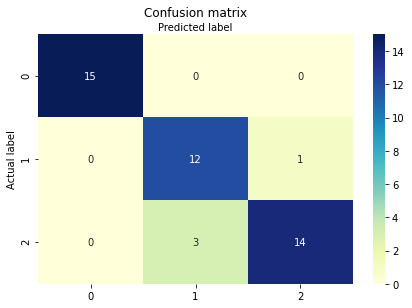

In [40]:
class_name = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.92      0.86        13
   virginica       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

